In [1]:
import torch as tc
from torch import nn
from torch.nn import functional as F


class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.convs = nn.ModuleList([nn.Conv2d(1, 1, 5, padding=2) for _ in range(2)])
        self.conv_transposes = nn.ModuleList([nn.ConvTranspose2d(1, 1, 5, padding=2) for _ in range(2)])
    
    def forward(self, x):
        x = self.encode(x)
        return self.decode(x)
        
    
    def encode(self, x):
        for conv in self.convs:
            x = conv(x)
            x = F.relu(x)
        return x
    
    def decode(self, x):
        for conv_transpose in self.conv_transposes:
            x = conv_transpose(x)
            x = F.relu(x)
        return x

In [2]:
from torchvision import transforms
import torchvision as tv
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.ToTensor()])
trainset = tv.datasets.FashionMNIST(root='data/', train=True, download=True, transform=transform)
testset = tv.datasets.FashionMNIST(root='data/', train=False, download=True, transform=transform)

trainloader = DataLoader(trainset, shuffle=True, batch_size=4)
testloader = DataLoader(testset, shuffle=False, batch_size=4)

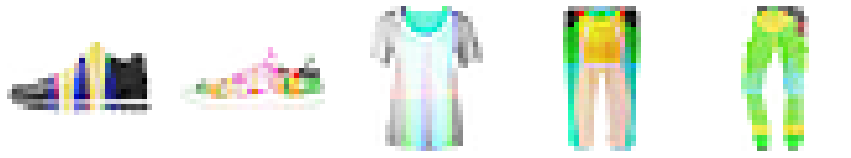

In [3]:
from matplotlib import pyplot as plt
import numpy as np
data = iter(trainloader)
plt.figure(figsize=(15, 5))
for i in range(5):
    images, label = next(data)
    plt.subplot(1, 5, i+1)
    plt.imshow(transforms.ToPILImage()(images.transpose(1, 0)[0]))
    plt.axis('off')
plt.show()

In [4]:
from torch import optim
device = tc.device('cuda:0')

auto_encoder = AutoEncoder()
auto_encoder.to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(auto_encoder.parameters(), lr=0.01)
for epoch in range(1):
    for images, label in trainloader:
        images = images.to(device)
        x = auto_encoder(images)
        optimizer.zero_grad()
        loss = loss_fn(x, images)
        loss.backward()
        optimizer.step()

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
    

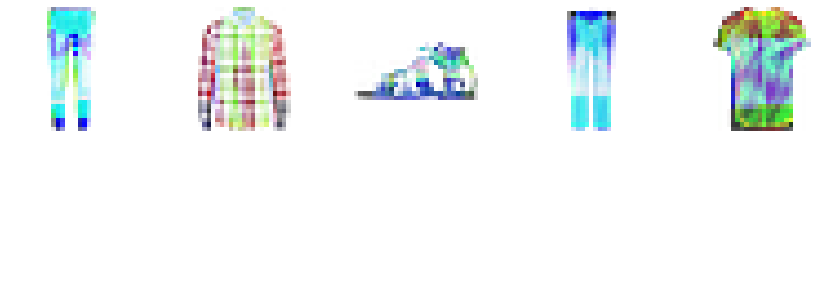

In [7]:
from matplotlib import pyplot as plt
import numpy as np
data = iter(testloader)
fig, axes = plt.subplots(2, 5, figsize=(15, 5))

for i in range(5):
    images, _ = next(data)
    images = images.to(device)
    ax = axes[0][i]
    ax.imshow(transforms.ToPILImage()(images.transpose(1, 0)[0].cpu()))
    ax.axis('off')
    
    reconstruct_images = auto_encoder(images)
    print(reconstruct_images)
    ax = axes[1][i]
    ax.imshow(transforms.ToPILImage()(reconstruct_images.transpose(1, 0)[0].cpu()))
    ax.axis('off')
plt.show()

In [6]:
list(auto_encoder.parameters())

[Parameter containing:
 tensor([[[[-0.0568,  0.0984,  0.0652,  0.1465, -0.1306],
           [-0.0040, -0.1714, -0.0512, -0.1820,  0.1392],
           [ 0.0293, -0.2224, -0.1013,  0.1533, -0.0421],
           [-0.0097, -0.1287, -0.0977,  0.1109, -0.0114],
           [-0.1103,  0.0490,  0.0822,  0.2203, -0.0050]]]], device='cuda:0',
        requires_grad=True),
 Parameter containing:
 tensor([-0.1068], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([[[[ 0.1116, -0.1376,  0.1477,  0.0702, -0.1885],
           [-0.1177, -0.0075,  0.0405, -0.0228, -0.0119],
           [-0.1954,  0.1319, -0.1857,  0.1263, -0.1318],
           [-0.0954, -0.0943,  0.1209,  0.0981, -0.1976],
           [-0.1806,  0.0978,  0.0977,  0.0475,  0.0107]]]], device='cuda:0',
        requires_grad=True),
 Parameter containing:
 tensor([0.1345], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([[[[ 0.0532,  0.0024,  0.0058,  0.1684, -0.0950],
           [ 0.0105,  0.1402,  0.045